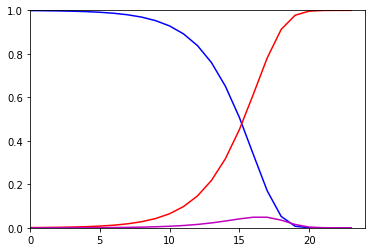

    xPlots        wPlots    dPlots    hPlots
0        0  9.990000e-01  0.001000  0.000000
1        1  9.984003e-01  0.001440  0.000160
2        2  9.975532e-01  0.002202  0.000245
3        3  9.962581e-01  0.003368  0.000374
4        4  9.942787e-01  0.005150  0.000571
5        5  9.912555e-01  0.007872  0.000873
6        6  9.866423e-01  0.012026  0.001331
7        7  9.796125e-01  0.018359  0.002028
8        8  9.689236e-01  0.027993  0.003083
9        9  9.527257e-01  0.042604  0.004670
10      10  9.283071e-01  0.064657  0.007036
11      11  8.917959e-01  0.097693  0.010511
12      12  8.379078e-01  0.146599  0.015493
13      13  7.600198e-01  0.217626  0.022354
14      14  6.512625e-01  0.317588  0.031149
15      15  5.080462e-01  0.451008  0.040945
16      16  3.378918e-01  0.613430  0.048679
17      17  1.700741e-01  0.781461  0.048465
18      18  5.232324e-02  0.912393  0.035284
19      19  7.020047e-03  0.977627  0.015353
20      20  3.009343e-04  0.996290  0.003409
21      21

In [17]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#graphing functions
def plot_2D(graphInfo, title="Generation plot"):
    fig=plt.figure()
    plt.plot(graphInfo["xPlots"],graphInfo["wPlots"],'b-')
    plt.plot(graphInfo["xPlots"],graphInfo["dPlots"],'r-')
    plt.plot(graphInfo["xPlots"],graphInfo["hPlots"],'m-')
    plt.axis([0,len(graphInfo["xPlots"]),0,1])
    plt.show()
def model3D(X,Y,Z,xLabel,yLabel, title):
    #3D graph
    import matplotlib.pyplot as plt
    from matplotlib import cm
    min=1000
    max=-1000
    for rIndex in range(len(Z)):
        for cIndex in range(len(Z[rIndex])):
            if Z[rIndex][cIndex]<min:
                min=Z[rIndex][cIndex]
            if Z[rIndex][cIndex]>max:
                max=Z[rIndex][cIndex]
    if min<-max:
        max=-min
    else:
        min=-max
    
    #label axes
    plt.xlabel(xLabel, fontdict=None, labelpad=None)
    plt.ylabel(yLabel, fontdict=None, labelpad=None)
    plt.title(title)

    
    plt.axis(aspect='image');
    plt.imshow(Z, origin='lower', extent=([0, 1, 0, 1]), vmax=max, vmin=min, cmap=cm.coolwarm)
    plt.show()
#model functions
def update_vars(oldDataDict, newDataDict):
    for key in newDataDict.keys():
        oldDataDict[key]=newDataDict[key]
    return oldDataDict
def run_generation(simData):
    #load variables
    d=simData['d']
    qW=simData['qW']
    qD=simData['qD']
    qH=simData['qH']
    sW=simData['sW']
    sD=simData['sD']
    e=simData['e']
    #manuscript equations
    #variables to prevent redundant multiplication
    w2=(qW*(1-sW))**2
    wd=qW*(1-sW)*(qD*(1-sD))
    wh=qW*(1-sW)*(qH*(1-sD*d))
    d2=(qD*(1-sD))**2
    dh=qD*(1-sD)*(qH*(1-sD*d))
    h2=(qH*(1-sD*d))**2
    
    qWP=w2+wh+.25*h2
    qDP=e*(2*wd+wh+dh+.5*h2)+d2+dh+.25*h2
    qHP=(1-e)*(2*wd+wh+dh+.5*h2)
    #bring total frequency back up to 1 and catch float rounding errors
    total=qWP+qDP+qHP
    if total!=1:
        qWP/=total
        qDP/=total
        qHP/=total
    return {'qW':qWP,'qD':qDP,'qH':qHP}

def run_simulation(simData,graph=False,debug=False):
    graphInfo={"xPlots": [0], "wPlots": [simData['qW']], "dPlots": [simData['qD']], "hPlots": [simData['qH']]}
    for i in range(1,simData['generations']+1):
        update_vars(simData,run_generation(simData))
        graphInfo['xPlots'].append(i)
        graphInfo['wPlots'].append(simData['qW'])
        graphInfo['dPlots'].append(simData['qD'])
        graphInfo['hPlots'].append(simData['qH'])
        if simData['qW']>.99999:
            if graph:
                plot_2D(graphInfo)
            if debug:
                print(pd.DataFrame(graphInfo))
            return -(i**(1/4))
        elif simData['qD']>.99999:
            if graph:
                plot_2D(graphInfo)
            if debug:
                print(pd.DataFrame(graphInfo))
            return i**(1/4)
    if graph:
        plot_2D(graphInfo)
    if debug:
        print(pd.DataFrame(graphInfo))
    return 0


simData={'qW':.999,'qD':.001,'qH':0,'sW':0,'sD':.2,'e':.9,'d':.5,'generations':1000}

print(run_simulation(simData,True,True))

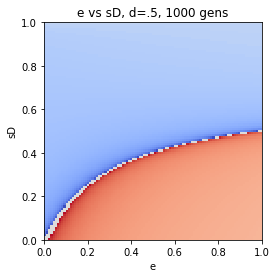

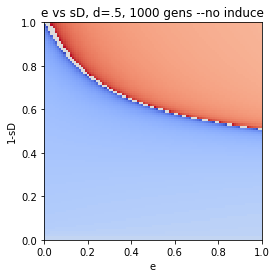

In [18]:
eVals=np.arange(0,1.01,.01)
sVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(eVals,sVals)
Z=np.zeros((len(eVals),len(sVals)))
#run 2D sim e vs f
for eIndex in range(len(eVals)):
    for sIndex in range(len(sVals)):
        #y is f
        simData={'qW':.999,'qD':.001,'qH':0,'sW':0,'sD':sVals[sIndex],'e':eVals[eIndex],'d':.5,'generations':1000}
        takeover=run_simulation(simData)
        Z[sIndex,eIndex]=takeover
model3D(X,Y,Z,'e','sD','e vs sD, d=.5, 1000 gens')

eVals=np.arange(0,1.01,.01)
sVals=np.arange(1.01,0,-.01)
X,Y=np.meshgrid(eVals,sVals)
Z=np.zeros((len(eVals),len(sVals)))
#run 2D sim e vs f
for eIndex in range(len(eVals)):
    for sIndex in range(len(sVals)):
        #y is f
        simData={'qW':.999,'qD':.001,'qH':0,'sW':0,'sD':sVals[sIndex],'e':eVals[eIndex],'d':.5,'generations':1000}
        takeover=run_simulation(simData)
        Z[sIndex,eIndex]=takeover
model3D(X,Y,Z,'e','1-sD','e vs sD, d=.5, 1000 gens --no induce')

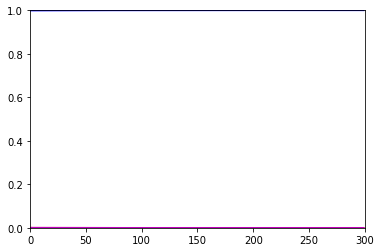

     xPlots    wPlots    dPlots    hPlots
0         0  0.999000  0.001000  0.000000
1         1  0.998800  0.000480  0.000720
2         2  0.998819  0.000473  0.000708
3         3  0.998838  0.000465  0.000697
4         4  0.998856  0.000458  0.000686
5         5  0.998875  0.000450  0.000675
6         6  0.998892  0.000443  0.000664
7         7  0.998910  0.000436  0.000654
8         8  0.998927  0.000429  0.000643
9         9  0.998945  0.000422  0.000633
10       10  0.998961  0.000416  0.000623
11       11  0.998978  0.000409  0.000613
12       12  0.998994  0.000402  0.000603
13       13  0.999010  0.000396  0.000594
14       14  0.999026  0.000390  0.000584
15       15  0.999042  0.000384  0.000575
16       16  0.999057  0.000377  0.000566
17       17  0.999072  0.000371  0.000557
18       18  0.999087  0.000365  0.000548
19       19  0.999101  0.000360  0.000539
20       20  0.999116  0.000354  0.000531
21       21  0.999130  0.000348  0.000522
22       22  0.999143  0.000343  0

In [19]:
simData={'qW':.999,'qD':.001,'qH':0,'sW':0,'sD':.4,'e':.4,'d':.4,'generations':1000}

print(run_simulation(simData,True,True))

In [20]:
e=.8
h=.4

for e in np.arange(0,1.1,.1):
    eq1=e/(1-h+e*h)
    eq2=e/(h*(1+e))
    print(e)
    print(eq1)
    print(eq2)
    print()

0.0
0.0
0.0

0.1
0.15625
0.22727272727272727

0.2
0.2941176470588236
0.4166666666666667

0.30000000000000004
0.41666666666666674
0.576923076923077

0.4
0.5263157894736842
0.7142857142857144

0.5
0.625
0.8333333333333333

0.6000000000000001
0.7142857142857143
0.9375

0.7000000000000001
0.7954545454545455
1.0294117647058822

0.8
0.8695652173913043
1.111111111111111

0.9
0.9375000000000001
1.1842105263157894

1.0
1.0
1.25

